Library for Boxplot simility between Alphacode and Human code

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt


Defined list of problem and contest index of each problem

In [2]:
listOfProblem= ['WebofLies','GregorandCryptography','PolycarpandCoins','WonderfulColoring','SubsequencePermutation','DigitsSum','RunningforGold',
'XORandDistance','Cherry','Cobb','Mikasa','AVarietyofOperations','EzzatandTwoSubsequences','MochaandMath','DislikeofThrees',
'SimplyStrangeSort','MedianMaximization','SeatingArrangementseasyversion','NonDecreasingDilemma','BalancedSubstring','Book',
'RegularBracketSequences']

nameMapProblem= {'WebofLies': '1549C','TheThreeLittlePigs': '1548C','GregorandtheTwoPainters': '1548E',
 'GregorandCryptography': '1549A','PolycarpandCoins': '1551A','WonderfulColoring': '1551B1',
 'SubsequencePermutation': '1552A','RunningforGold': '1552B','Backspace': '1553D','PermutationShift': '1553E',
 'DigitsSum': '1553A','XORandDistance': '1553H','Cherry': '1554A','Cobb': '1554B',
 'Mikasa': '1554C','SayNotoPalindromes': '1555D','AVarietyofOperations': '1556A','Moamenandksubarrays': '1557B',
 'EzzatandTwoSubsequences': '1557A','MochaandMath': '1559A','MochaandRedandBlue': '1559B','MochaandDianaEasyVersion': '1559D1',
 'DislikeofThrees': '1560A','InfinityTable': '1560C','NearestBeautifulNumbereasyversion': '1560F1','NearestBeautifulNumberhardversion': '1560F2',
 'SimplyStrangeSort': '1561A','ScenesFromaMemory': '1562B','SeatingArrangementseasyversion': '1566D1',
 'MINMEXCut': '1566B','MedianMaximization': '1566A','BudsRehanging': '1566E','NonDecreasingDilemma': '1567E',
 'BalancedSubstring': '1569A','Book': '1573C','Countdown': '1573A','RegularBracketSequences': '1574A',
 'CombinatoricsHomework': '1574B','MinimizeDistance': '1585C','MissingBigram': '1618B',
 "Singers'Tour": '1618E',"NewYear'sProblem": '1619D','GameonRanges': '1623B'}

In this step, we read the C++ result file and normalize it into a Pandas dataframe. We compute the median of all problems and also find the human code file that is most similar to alphacode. (The result file came from CodeHash tools from Ishio)

In [3]:
#Cpp plot

cppSimDF = pd.DataFrame(columns={'Sim','name'})
cppOverlapDF = pd.DataFrame(columns={'Overlab','name'})
path ='/Users/silalertbanjongngam/Desktop/CodeInTheResearch/RawData/CPP/simALL'
lstt = os.listdir('/Users/silalertbanjongngam/Desktop/CodeInTheResearch/RawData/CPP/')
median = []
mean = []
for i in lstt:
    if(i in listOfProblem):
        print(i)
        file = open(f'{path}/{i}_similarity.txt','r').read().split('\n')
        try:
            a = [[float(x.split(' ')[1][1:]),float(x.split(' ')[2][:-1]),x.split(' ')[0][1:-1] ] for x in file if(len(x) >1)]   
            sim = [x[0] for x in a]
            tmpsim= np.array(sim)
            overlab = [x[1] for x in a]
            name = [i for x in range(len(overlab))]
            for j in range(len(name)):
                cppSimDF = cppSimDF.append({'Sim':sim[j],'name':nameMapProblem[i]},ignore_index=True)
                cppOverlapDF = cppOverlapDF.append({'Overlab':overlab[j],'name':nameMapProblem[i]},ignore_index=True)
            print('The most Humancode similar with Alphacode(C++)',sorted(a,reverse=True)[0][2][sorted(a,reverse=True)[0][2].rfind('/')+1:])
            medsim = np.median(tmpsim)
            meansim = np.mean(tmpsim)
            median.append(medsim)
            mean.append(meansim)
        except:
            sim =0
            overlab =0
            name = i
            cppSimDF = sim.append({'Sim':sim,'name':nameMapProblem[i]},ignore_index=True)
            cppOverlapDF = cppOverlapDF.append({'Overlab':overlab,'name':nameMapProblem[i]},ignore_index=True)
            print('no human code submission',sim,overlab,nameMapProblem[i])
            median.append(0)
            mean.append(0)
# print(np.median(np.array(median)))
    
    

# ax = sns.boxplot(y='Sim',x='name',data=cppSimDF)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')

NonDecreasingDilemma
133242420.cpp
GregorandCryptography
155305938.cpp
PolycarpandCoins
156419403.cpp
SimplyStrangeSort
140945760.cpp
MedianMaximization
150593858.cpp
DigitsSum
145909713.cpp
RunningforGold
154976672.cpp
RegularBracketSequences
153160345.cpp
WonderfulColoring
145909584.cpp
Cherry
146489751.cpp
Mikasa
145815627.cpp
WebofLies
130088964.cpp
MochaandMath
153811222.cpp
BalancedSubstring
143870038.cpp
Book
153560750.cpp
SeatingArrangementseasyversion
152659821.cpp
DislikeofThrees
157080588.cpp
EzzatandTwoSubsequences
156285949.cpp
AVarietyofOperations
138539487.cpp
XORandDistance
150146958.cpp
SubsequencePermutation
145909696.cpp
Cobb
135085350.cpp
0.26948770173384556


In [ ]:
print(np.median(np.array(median)))
print(np.mean(np.array(mean)))

We used the dataframe from the previous cell to boxplot illustrate the result of similiraity between Alpha code and ALl human code in C++ language.

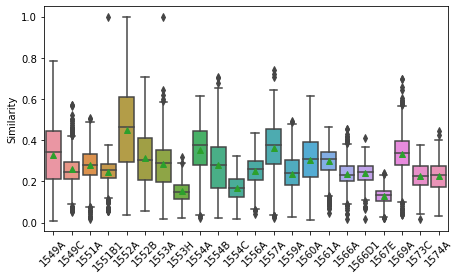

In [25]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
cppSimDF=cppSimDF.sort_values(by='name')
sns_cpp =  sns.boxplot(y='Sim',x='name',data=cppSimDF,showmeans=True)
sns_cpp.set_xticklabels(sns_cpp.get_xticklabels(), rotation=45,horizontalalignment='center')
fig = sns_cpp.get_figure()
fig = sns_cpp.set_ylabel("Similarity")
fig = sns_cpp.set_xlabel("")
fig = sns_cpp.get_figure()
fig.set_size_inches(6.5, 4)

# fig.set_size_inches(10, 10)


In this step, we read the Python result file and normalize it into a Pandas dataframe. We compute the median of all problems and also find the human code file that is most similar to alphacode. (The result file came from CodeHash tools from Ishio)

In [26]:
#Python plot

pythonSimDF = pd.DataFrame(columns={'Sim','name'})
cppOverlapDF = pd.DataFrame(columns={'Overlab','name'})
path ='/Users/silalertbanjongngam/Desktop/CodeInTheResearch/RawData/PYTHON/simALL'
lstt = os.listdir('/Users/silalertbanjongngam/Desktop/CodeInTheResearch/RawData/PYTHON/')
medianpy=[]
meanpy=[]
for i in lstt:
    if(i in listOfProblem):
        print(nameMapProblem[i])
        try:
            file = open(f'{path}/{i}_similarity.txt','r').read().split('\n')
            a = [[float(x.split(' ')[1][1:]),float(x.split(' ')[2][:-1]),x.split(' ')[0][1:-1] ] for x in file if(len(x) >1)]
            sim = [x[0] for x in a]
            tmpsim = np.array(sim)
            overlab = [x[1] for x in a]
            name = [i for x in range(len(overlab))]
            for j in range(len(name)):
                pythonSimDF = pythonSimDF.append({'Sim':sim[j],'name':nameMapProblem[i]},ignore_index=True)
                cppOverlapDF = cppOverlapDF.append({'Overlab':overlab[j],'name':nameMapProblem[i]},ignore_index=True)
            print('The most Humancode similar with Alphacode(Python)',sorted(a,reverse=True)[0][2][sorted(a,reverse=True)[0][2].rfind('/')+1:])
            medsim = np.median(tmpsim)
            medianpy.append(medsim)
            meanp= np.mean(tmpsim)
            meanpy.append(meanp)
        except:
            sim =0
            overlab =0
            name = i
            pythonSimDF = pythonSimDF.append({'Sim':sim,'name':nameMapProblem[i]},ignore_index=True)
            cppOverlapDF = cppOverlapDF.append({'Overlab':overlab,'name':nameMapProblem[i]},ignore_index=True)
            print('no human code submission',sim,overlab,nameMapProblem[i])
            medianpy.append(0)
            meanpy.append(0)
print(np.median(np.array(medianpy)))

# ax = sns.boxplot(y='Sim',x='name',data=pythonSimDF)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')

1567E
0 0 1567E
1549A
125173543.py
1551A
154143464.py
1561A
126890439.py
1566A
128612380.py
1553A
150458824.py
1552B
123799846.py
1574A
129370350.py
1551B1
123514594.py
1554A
124130199.py
1554C
141955961.py
1549C
124546947.py
1559A
126186253.py
1569A
128220721.py
1573C
130336413.py
1566D1
128841002.py
1560A
145863453.py
1557A
133401718.py
1556A
127342254.py
1553H
0 0 1553H
1552A
153547183.py
1554B
0 0 1554B
0.2858037282565584


In [ ]:
print(np.median(np.array(medianpy)))
print(np.mean(np.array(meanpy)))

We used the dataframe from the previous cell to boxplot illustrate the result of similiraity between Alpha code and All human code in Python language.

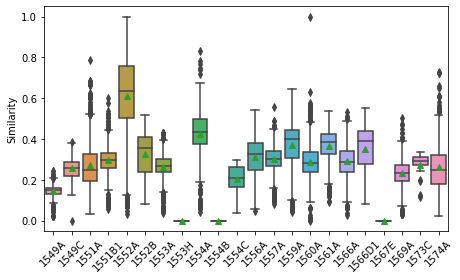

In [29]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
pythonSimDF=pythonSimDF.sort_values(by='name')
sns_py =  sns.boxplot(y='Sim',x='name',data=pythonSimDF,showmeans=True)
sns_py.set_xticklabels(sns_py.get_xticklabels(), rotation=45,horizontalalignment='center')
fig = sns_py.get_figure()
fig = sns_py.set_ylabel("Similarity")
fig = sns_py.set_xlabel("")
fig = sns_py.get_figure()
fig.set_size_inches(6.5, 4)

# fig.set_size_inches(10, 10)

# fig.savefig('python-boxplot.pdf')